In [2]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
#!git clone https://github.com/Muhammad-Talha-Bilal/AI_Proj

Cloning into 'AI_Proj'...
remote: Enumerating objects: 1423, done.
remote: Total 1423 (delta 0), reused 0 (delta 0), pack-reused 1423
Receiving objects: 100% (1423/1423), 255.00 MiB | 12.83 MiB/s, done.
Updating files: 100% (1456/1456), done.


In [4]:
import tensorflow as tf
import numpy as np
import cv2
import os
import imghdr
from matplotlib import pyplot as plt


<h1>2. Remove dodgy images

In [5]:
data_dir = 'AI_Proj'
image_exts = ['jpeg','jpg', 'bmp', 'png']

for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            #os.remove(image_path)

Image not in ext list AI_Proj/rottenonions/how-to-store-onions-1200x628-fb-1200x628.jpg
Image not in ext list AI_Proj/rottenonions/v4-460px-Tell-if-an-Onion-Is-Bad-Step-1.jpg.webp
Image not in ext list AI_Proj/rottenonions/rotten-onion-old-red-on-600w-1992705335.jpg
Image not in ext list AI_Proj/rottenonions/heap-of-fresh-and-rotten-red-onions-54y1rh2u1ubsrb2s.jpg
Image not in ext list AI_Proj/rottenonions/onion.jpg
Image not in ext list AI_Proj/rottenonions/onion-mahmud-hossain-opu-1576342027074.jpg
Image not in ext list AI_Proj/rottenonions/prothomalo-english2F2020-092F11431ffe-341e-4d10-bbc0-b22c4d4f4ef22F5486716_7092964_Onion.jpg
Image not in ext list AI_Proj/freshonions/onions-1200x628-facebook-1200x628.jpg
Image not in ext list AI_Proj/freshonions/JYdUyUKExr.webp
Image not in ext list AI_Proj/freshonions/3d066fe6798c79cdbc0d925936463dc0.jpg_750x750.jpg_.webp
Image not in ext list AI_Proj/freshonions/de0edf1395202d70b368f34ef2.jpg4e_360w_360h.src7C95Q.webp
Image not in ext list AI

**Loading Dataset**

In [6]:
data = tf.keras.utils.image_dataset_from_directory('AI_Proj')
data_iterator = data.as_numpy_iterator()

Found 1349 files belonging to 12 classes.


In [7]:
batch = data_iterator.next()

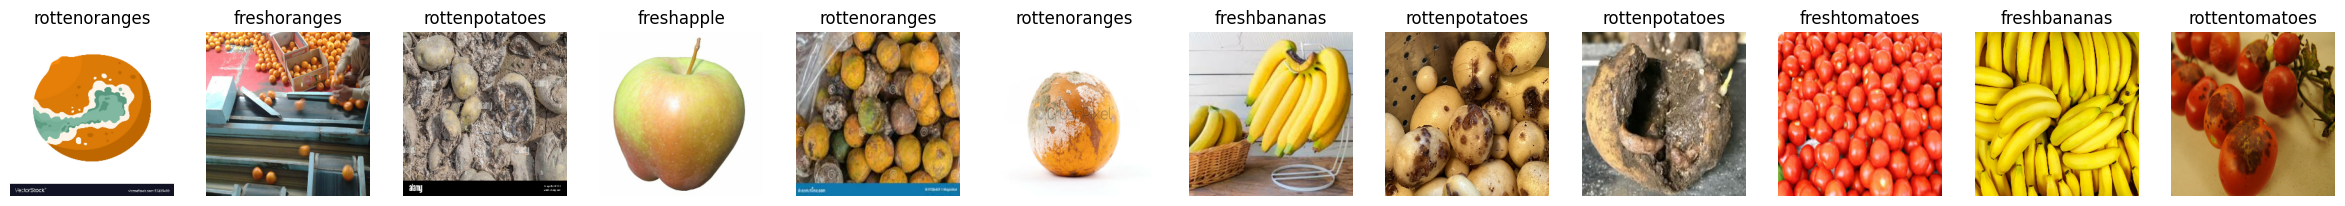

In [32]:
class_titles = ['freshapple', 'freshbananas', 'freshonions', 'freshoranges', 'freshpotatoes',
                'freshtomatoes', 'rottenapples', 'rottenbananas', 'rottenonions',
                'rottenoranges', 'rottenpotatoes', 'rottentomatoes']

fig, ax = plt.subplots(ncols=12, figsize=(30,30))

# Assuming batch is a tuple containing images and labels
for idx, (img, label) in enumerate(zip(batch[0][:12], batch[1][:12])):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(class_titles[label])
    ax[idx].axis('off')

plt.show()

In [9]:
data = data.map(lambda x,y: (x/255, y))

In [10]:
data.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

**Splitting Data**

In [11]:
print("Total Batches: ", len(data))
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1) + 1

print(train_size, " ", val_size," " , test_size)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Total Batches:  43
30   8   5


**Building Deep Learning Model**

In [12]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(12, activation='softmax'))


In [14]:
model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [16]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
30/30 [==============================] - 35s 944ms/step - loss: 2.4306 - accuracy: 0.1760 - val_loss: 2.1678 - val_accuracy: 0.2227
Epoch 2/20
30/30 [==============================] - 24s 747ms/step - loss: 1.9957 - accuracy: 0.3354 - val_loss: 1.7215 - val_accuracy: 0.4180
Epoch 3/20
30/30 [==============================] - 30s 972ms/step - loss: 1.4798 - accuracy: 0.5250 - val_loss: 1.3927 - val_accuracy: 0.5430
Epoch 4/20
30/30 [==============================] - 34s 1s/step - loss: 1.1034 - accuracy: 0.6458 - val_loss: 1.2162 - val_accuracy: 0.6055
Epoch 5/20
30/30 [==============================] - 22s 685ms/step - loss: 0.6521 - accuracy: 0.8125 - val_loss: 1.1574 - val_accuracy: 0.6367
Epoch 6/20
30/30 [==============================] - 22s 682ms/step - loss: 0.4081 - accuracy: 0.8771 - val_loss: 1.0522 - val_accuracy: 0.7227
Epoch 7/20
30/30 [==============================] - 32s 1s/step - loss: 0.2110 - accuracy: 0.9583 - val_loss: 0.9670 - val_accuracy: 0.7422
Epoch

Epoch 1/20
30/30 [==============================] - 31s 987ms/step - loss: 0.0550 - accuracy: 0.9896 - val_loss: 1.1625 - val_accuracy: 0.7930
Epoch 2/20
30/30 [==============================] - 22s 667ms/step - loss: 0.0494 - accuracy: 0.9927 - val_loss: 0.9872 - val_accuracy: 0.8320
Epoch 3/20
30/30 [==============================] - 22s 676ms/step - loss: 0.0483 - accuracy: 0.9885 - val_loss: 0.9378 - val_accuracy: 0.8242
Epoch 4/20
30/30 [==============================] - 31s 986ms/step - loss: 0.0228 - accuracy: 0.9948 - val_loss: 0.9578 - val_accuracy: 0.8203
Epoch 5/20
30/30 [==============================] - 23s 709ms/step - loss: 0.0298 - accuracy: 0.9969 - val_loss: 0.8914 - val_accuracy: 0.8242
Epoch 6/20
30/30 [==============================] - 31s 986ms/step - loss: 0.0427 - accuracy: 0.9917 - val_loss: 0.9812 - val_accuracy: 0.8008
Epoch 7/20
30/30 [==============================] - 21s 653ms/step - loss: 0.0201 - accuracy: 0.9958 - val_loss: 0.8147 - val_accuracy: 0.8398

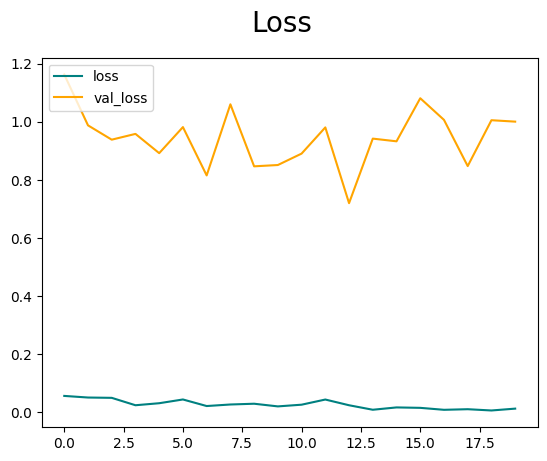

In [17]:
hist = model.fit(train, epochs=20, validation_data=val)
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

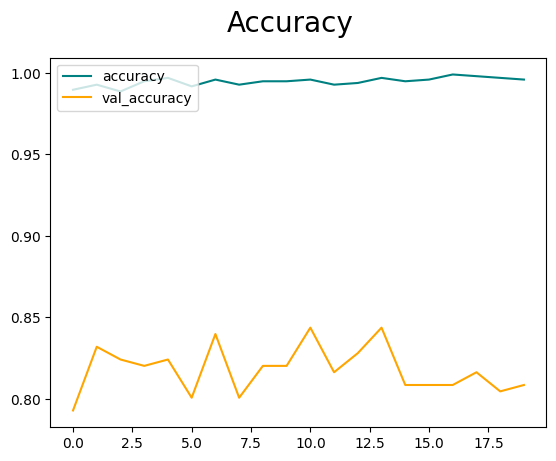

In [18]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

**Testing Metrics**

In [19]:
test_loss, test_acc = model.evaluate(test)
print('Test accuracy:', test_acc)

5/5 [==============================] - 12s 69ms/step - loss: 1.0710 - accuracy: 0.7820
Test accuracy: 0.7819548845291138


**Saving Model**

In [ ]:
from tensorflow.keras.models import load_model

model.save(os.path.join('models','mymodel1.h5'))



**Loading Saved Model**

In [28]:
from tensorflow.keras.models import load_model

new_model = load_model('models/mymodel1.h5')

y_hat = new_model.predict(test)
print(y_hat)
predicted_classes = np.argmax(y_hat, axis=1)

print(predicted_classes)



5/5 [==============================] - 11s 15ms/step
[[9.22271647e-05 6.80765297e-05 9.95979905e-01 ... 6.55730721e-04
  1.33181398e-04 4.59335221e-04]
 [3.66492236e-06 2.58962209e-05 7.31129194e-06 ... 4.65545148e-01
  2.34405145e-01 4.42207092e-03]
 [6.45773935e-06 2.83048466e-05 1.31394895e-08 ... 9.99897361e-01
  4.14287200e-07 2.73730354e-08]
 ...
 [9.65448663e-08 4.11683491e-14 7.39860013e-07 ... 1.13033739e-05
  2.05616374e-07 9.99900103e-01]
 [4.55441186e-03 1.32240066e-02 8.02545249e-01 ... 4.74019861e-03
  4.21935320e-02 5.77844679e-04]
 [4.03424085e-04 5.14469743e-02 1.13794675e-04 ... 5.05133998e-04
  4.34479589e-04 7.16087816e-04]]
[ 2  9  9  6  1  0  0  8  0  9  3  4  9 11  6  0  2 10  3  6 11  1  2  0
  9  0  0  9 11  7  6 10  3  4  5 10  8  6  8  8  7  1  5  1  3  8  3  1
  1  8  2  0  5  0 11  6  5  5 11  1 10 10  9 10  8  7  0  4 11  8  9  0
  0  8  1 11  5 11  0 11  0  1 11  0  9  4 11  5  0  3  0  1  6  7 10 11
  3  1 10  0 10  8  3  8  1  0  3  0  1  8  1  8  8 11 

**Test on new input**


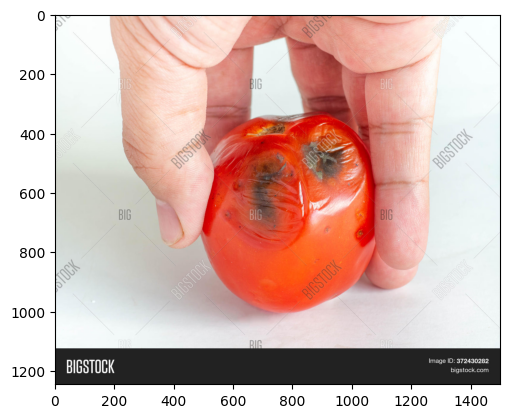

1/1 [==============================] - 0s 19ms/step
Predicted class: rottentomatoes


In [34]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

image_path = ''


class_titles = ['freshapple', 'freshbananas', 'freshonions', 'freshoranges', 'freshpotatoes',
                'freshtomatoes', 'rottenapples', 'rottenbananas', 'rottenonions',
                'rottenoranges', 'rottenpotatoes', 'rottentomatoes']

# Load the image
img = load_img(image_path, target_size=(256, 256))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = preprocess_input(img_array)  # Preprocess the image

img = cv2.imread(image_path) # Path of input image to read
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()
y_hat = new_model.predict(img_array)

# Predicted class
predicted_class = np.argmax(y_hat, axis=1)[0]
print("Predicted class:", class_titles[predicted_class])